This notebook is the solution for the fourth task of the Stonksmaster project. Using a dataset formatted like the Boston Housing Data, we predict the house prices using various regression algorithms from the scikit-learn library.

In [180]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import seaborn as sb
from sklearn.ensemble import GradientBoostingRegressor

We can plot a correlation matrix to check which features must be included in the data that is used to train the ML model.

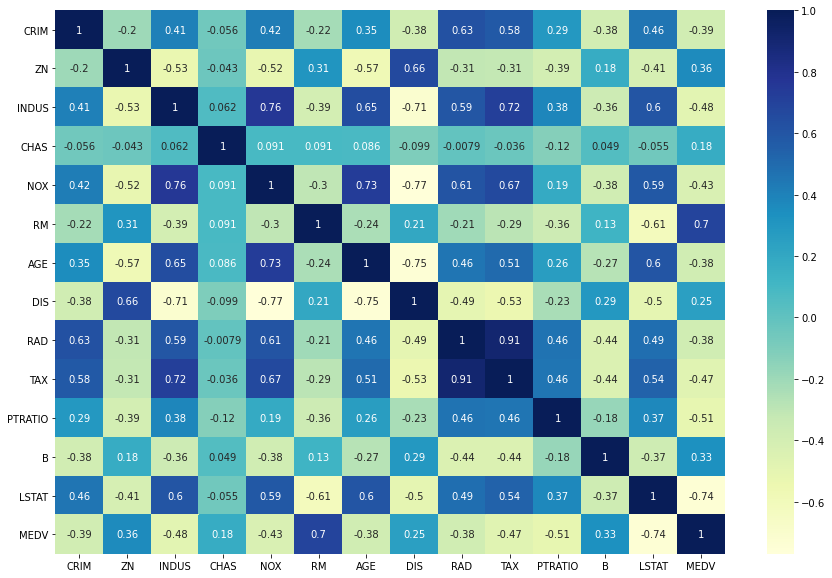

In [181]:
# create a subplot to fix size of the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))

# read csv file and create pandas dataframe
housing_df = pd.read_csv('housing.csv', sep='\s+', engine='python')
housing_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# plot the heatmap
sb.heatmap(housing_df.corr(), annot=True, cmap='YlGnBu')

In [182]:
# iterate over all columns and fill in missing values with the median of the remaining values of the column
for column in housing_df.columns:
  housing_df[column] = housing_df[column].fillna(housing_df[column].median())

# input features are all columns except MEDV
X = housing_df.drop(columns=['MEDV', 'CHAS'])
scaled_X = MinMaxScaler().fit_transform(X)

# output feature is MEDV
y = housing_df['MEDV']

# splitting the dataset into training and testing sets using the train_test_split function of sklearn library
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)

In [183]:
# constant params
num_folds = 5
scoring = 'r2'

# creating array of models that are going to be evaluated
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# list to store results
results = []

# iterating over the models and checking the score of each over the testing dataset
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
  results.append(cv_result)
  print(f'{name} has mean {round(cv_result.mean(), 3)} with standard deviation {round(cv_result.std(), 3)}')

LR has mean 0.694 with standard deviation 0.058
LASSO has mean 0.223 with standard deviation 0.048
KNN has mean 0.78 with standard deviation 0.026
CART has mean 0.701 with standard deviation 0.135
SVR has mean 0.578 with standard deviation 0.116


From the cv_result data we see that the KNN model is the most successful in predicting the output as it has the highest mean score. Hence, we can proceed to train this model to start making predictions.

r2 score of the model is 0.791


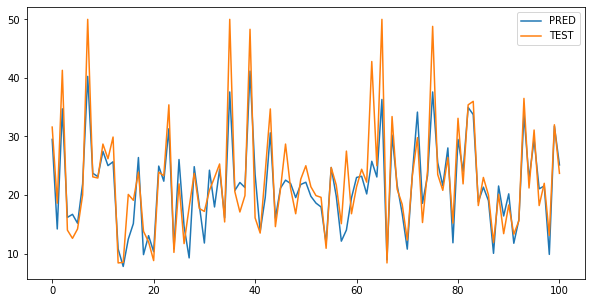

In [184]:
# select the K-Neighbors Regressor model and train it on the training dataset
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# start making predictions based on the testing data
predictions = model.predict(X_test)

# creating output dataframe consisting of the predictions and the testing values
output_dataframe = pd.DataFrame(predictions, columns=['PRED'])
output_dataframe['TEST'] = y_test.values

# plot the dataframe for visualization
output_dataframe.plot(figsize=(10,5))

# calculate and display the r2 score
print(f'r2 score of the model is {round(r2_score(y_test.values, predictions),3)}')

For trying out models that have higher accuracy, we can try to use Ensemble models.

r2 score of the model is 0.913


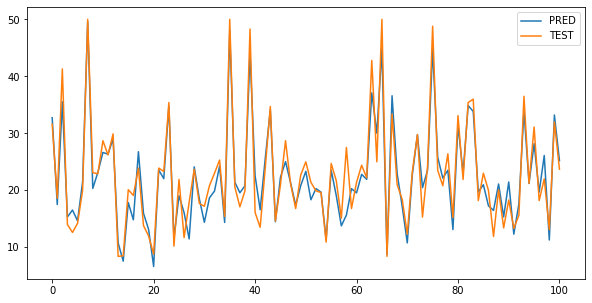

In [185]:
# select the Gradient Boosting Regressor model and train it on the training dataset
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)

# start making predictions based on the testing data
predictions = model.predict(X_test)

# creating output dataframe consisting of the predictions and the testing values
output_dataframe = pd.DataFrame(predictions, columns=['PRED'])
output_dataframe['TEST'] = y_test.values

# plot the dataframe for visualization
output_dataframe.plot(figsize=(10,5))

# calculate and display the r2 score
print(f'r2 score of the model is {round(r2_score(y_test.values, predictions),3)}')